In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from datetime import datetime, timedelta
import folium
from folium import Popup

In [117]:
# Load the datasets from JSON files
user_data = pd.read_json('user_data.json')
landlord_data = pd.read_json('landlord_data.json')
history_data = pd.read_json('history_data.json')
private_parking_data = pd.read_json('private_parking_freiburg.json')
public_parking_data = pd.read_json('public_parking.json')

# Show the first few rows to verify the data
print(user_data.head())
print(landlord_data.head())
print(history_data.head())
print(private_parking_data.head())
print(public_parking_data.head())


    user_id             name      username  password license_plate_number  \
0  UID12697      Anna Wagner    awagner761  QjFTCuLb           FR UR 4354   
1  UID18608     Leon Richter   lrichter665  qOIulDz3           FR PY 1026   
2  UID74134  Sophia Hoffmann  shoffmann108  62tkMpge           FR FL 9616   
3  UID65514     Leon Fischer   lfischer182  L78PnWOT           FR DC 9945   
4  UID99266        Paul Koch      pkoch418  aH4ToYCd           FR ZU 1372   

   credits  
0   189.56  
1   375.98  
2   291.71  
3    15.74  
4   110.97  
  landlord_id         name    username  password         phone_number
0    LID45833   Lena Weber   lweber578  V93EDBkO  +49 (0)750 308-8530
1    LID52831  Leon Müller  lmüller770  dIO57xY8  +49 (0)254 107-9141
2    LID82587    Mia Weber   mweber842  Nf1mL7T3  +49 (0)327 379-8107
3    LID48656  Paul Müller  pmüller670  FVWafrV3  +49 (0)740 936-7940
4    LID26755   Max Müller  mmüller793  8U2AxUck  +49 (0)843 582-4442
  history_id  rating                   

In [118]:
# Check general information for each dataframe
print(user_data.info())
print(landlord_data.info())
print(history_data.info())
print(private_parking_data.info())
print(public_parking_data.info())

# Check basic statistics for numerical columns
print(user_data.describe())
print(landlord_data.describe())
print(history_data.describe())
print(private_parking_data.describe())
print(public_parking_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               100 non-null    object 
 1   name                  100 non-null    object 
 2   username              100 non-null    object 
 3   password              100 non-null    object 
 4   license_plate_number  100 non-null    object 
 5   credits               100 non-null    float64
dtypes: float64(1), object(5)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   landlord_id   100 non-null    object
 1   name          100 non-null    object
 2   username      100 non-null    object
 3   password      100 non-null    object
 4   phone_number  100 non-null    object
dtypes: object(5)
memory usage: 4.0

In [119]:
# Check for missing values
print(user_data.isnull().sum())
print(landlord_data.isnull().sum())
print(history_data.isnull().sum())
print(private_parking_data.isnull().sum())
print(public_parking_data.isnull().sum())

# Check for duplicates
print(user_data.duplicated().sum())
print(landlord_data.duplicated().sum())
print(history_data.duplicated().sum())
print(private_parking_data.duplicated().sum())
print(public_parking_data.duplicated().sum())


user_id                 0
name                    0
username                0
password                0
license_plate_number    0
credits                 0
dtype: int64
landlord_id     0
name            0
username        0
password        0
phone_number    0
dtype: int64
history_id           0
rating               0
review_text          0
user_id              0
parking_id           0
parking_latitude     0
parking_longitude    0
booking_latitude     0
booking_longitude    0
distance             0
datetime             0
dtype: int64
private_id         0
name               0
address            0
latitude           0
longitude          0
price              0
capacity           0
available_space    0
special_access     0
landlord_id        0
opening_time       0
dtype: int64
public_id             0
name                  0
address               0
latitude              0
longitude             0
price_per_hour        0
capacity              0
available_space    2379
opening_time          0
dt

In [120]:
# Merge the history data with user data to analyze booking behavior
user_history = pd.merge(history_data, user_data, on='user_id')

# Count how many times each user has booked a parking space
user_booking_counts = user_history.groupby('user_id').size().reset_index(name='booking_count')
print(user_booking_counts.head())

# Explore the average rating per user
avg_ratings_per_user = user_history.groupby('user_id')['rating'].mean().reset_index(name='average_rating')
print(avg_ratings_per_user.head())


    user_id  booking_count
0  UID11129              1
1  UID11625              2
2  UID12397              1
3  UID12697              2
4  UID13377              1
    user_id  average_rating
0  UID11129             5.0
1  UID11625             3.0
2  UID12397             5.0
3  UID12697             3.5
4  UID13377             0.0


In [121]:
# Check the number of private and public parking spaces
private_parking_count = private_parking_data.shape[0]
public_parking_count = public_parking_data.shape[0]
print(f"Private parking spaces: {private_parking_count}")
print(f"Public parking spaces: {public_parking_count}")

# Explore the total capacity of private and public parking spaces
total_private_capacity = private_parking_data['capacity'].sum()
total_public_capacity = public_parking_data['capacity'].sum()
print(f"Total private parking capacity: {total_private_capacity}")
print(f"Total public parking capacity: {total_public_capacity}")


Private parking spaces: 150
Public parking spaces: 2536
Total private parking capacity: 816
Total public parking capacity: 219176


In [122]:
# Merge the private parking data with landlord data
private_parking_landlord = pd.merge(private_parking_data, landlord_data, on='landlord_id')

# Count the number of parking spaces each landlord manages
landlord_parking_count = private_parking_landlord.groupby('landlord_id')['private_id'].count().reset_index(name='parking_count')
print(landlord_parking_count.head())

# Count the number of private parking spaces per landlord
landlord_parking_capacity = private_parking_landlord.groupby('landlord_id')['capacity'].sum().reset_index(name='total_capacity')
print(landlord_parking_capacity.head())


  landlord_id  parking_count
0    LID10715              1
1    LID11461              2
2    LID11527              4
3    LID12781              1
4    LID14096              3
  landlord_id  total_capacity
0    LID10715               6
1    LID11461              13
2    LID11527              18
3    LID12781              10
4    LID14096               7


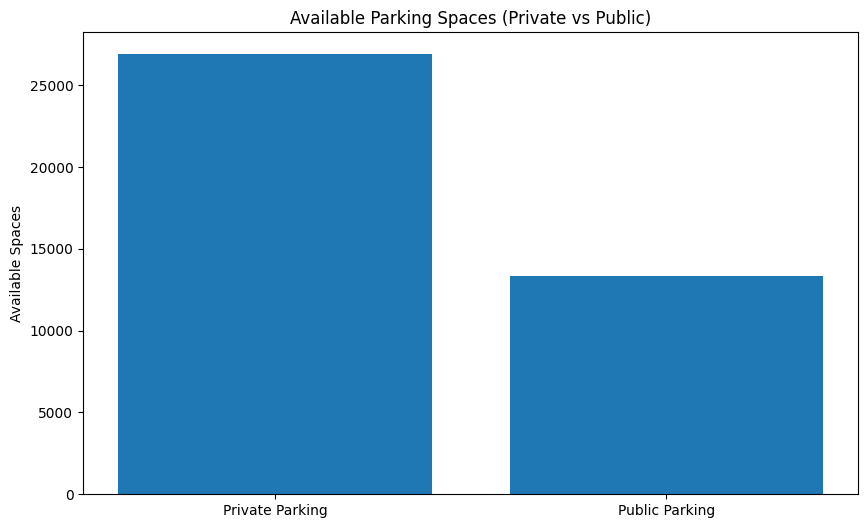

In [123]:
# Bar plot of available spaces in private vs public parking
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(['Private Parking', 'Public Parking'], [private_parking_data['available_space'].sum(), public_parking_data['available_space'].sum()])
ax.set_title('Available Parking Spaces (Private vs Public)')
ax.set_ylabel('Available Spaces')
plt.show()


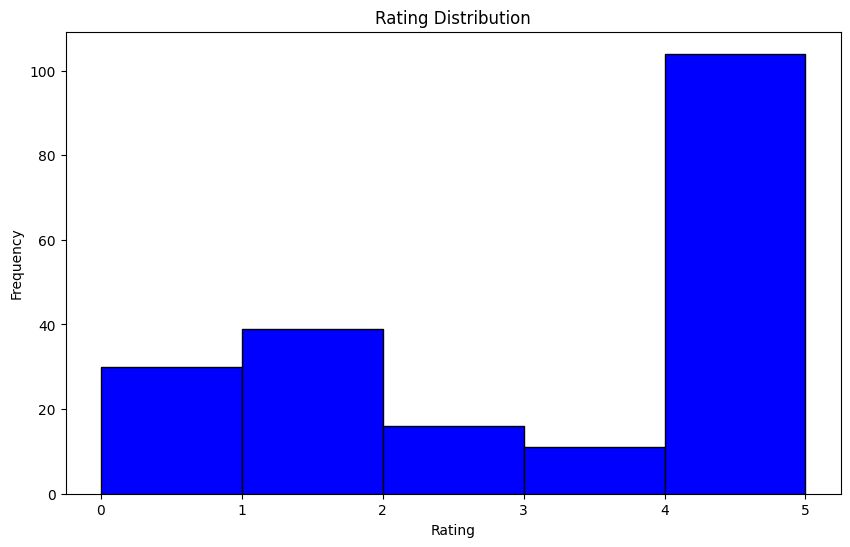

In [124]:
# Plot the rating distribution from the history data
plt.figure(figsize=(10, 6))
plt.hist(history_data['rating'], bins=5, color='blue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [125]:
# Combine both public and private parking data
all_parking_data = pd.concat([private_parking_data, public_parking_data], ignore_index=True)

# Example: Count how many parking spaces are available in total
total_available_spaces = all_parking_data['available_space'].sum()
print(f"Total available parking spaces: {total_available_spaces}")


Total available parking spaces: 40226.0


In [136]:
# Convert the 'datetime' column to pandas datetime format
history_data['datetime'] = pd.to_datetime(history_data['datetime'])

# Get today's date and the date 30 days ago
seven_days_ago = datetime.now() - timedelta(days=30)

# Filter the history_data to include only the rows from the last 30 days
history_data_recent = history_data[history_data['datetime'] >= seven_days_ago]

# Function to calculate the distance between two points (latitude, longitude)
def calculate_distance(row):
    parking_location = (row['parking_latitude'], row['parking_longitude'])
    booking_location = (row['booking_latitude'], row['booking_longitude'])
    return geodesic(parking_location, booking_location).km

# Recalculate the distance for each booking in the filtered data (recent 30 days)
history_data_recent['calculated_distance'] = history_data_recent.apply(calculate_distance, axis=1)

# Create a base map centered on the average booking coordinates from the recent 30 days
map_center = [history_data_recent['booking_latitude'].mean(), history_data_recent['booking_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers and lines to the map for the recent 30 days data
for _, row in history_data_recent.iterrows():
    parking_location = (row['parking_latitude'], row['parking_longitude'])

    booking_location = (row['booking_latitude'], row['booking_longitude'])
    time_booked = row['datetime']  
    rating = row['rating']
    review_text = row['review_text']


    popup_content = f"""
    <b>Booking Location:</b> {booking_location}<br>
    <b>Rating:</b> {rating}<br>
    <b>Review:</b> {review_text}<br>
    <b>Time Booked:</b> {time_booked}
    """
    
    # Add a marker for the parking location
    folium.Marker(
        parking_location,
        popup=Popup(f"Parking Location: {parking_location}", parse_html=True),
        icon=folium.Icon(color='blue', icon='car', prefix='fa')
    ).add_to(m)
    
    # Add a marker for the booking location
    folium.Marker(
        booking_location,
        popup=Popup(popup_content, parse_html=True),
        icon=folium.Icon(color='green', icon='home', prefix='fa')
    ).add_to(m)
    
    # Draw a line between the parking and booking locations
    folium.PolyLine(
        [parking_location, booking_location],
        color="red",
        weight=2.5,
        opacity=0.8,
        tooltip=f"Distance: {row['calculated_distance']:.2f} km"
    ).add_to(m)

# Save the map to an HTML file or display it
m.save('map_visualization_recent_30_days.html')
m





C:\Users\vae.tiolamon\AppData\Local\Temp\ipykernel_12392\1125461769.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  history_data_recent['calculated_distance'] = history_data_recent.apply(calculate_distance, axis=1)


In [127]:
import folium
from folium.plugins import HeatMap

# Create a map centered around a midpoint (average latitude and longitude of parking locations)
map_center = [private_parking_data['latitude'].mean(), private_parking_data['longitude'].mean()]
parking_map = folium.Map(location=map_center, zoom_start=13)

# Combine private and public parking data for the heatmap
combined_parking_data = pd.concat([private_parking_data[['latitude', 'longitude']], 
                                   public_parking_data[['latitude', 'longitude']]], ignore_index=True)

# Add a heatmap layer
HeatMap(combined_parking_data).add_to(parking_map)

# Display the map
parking_map


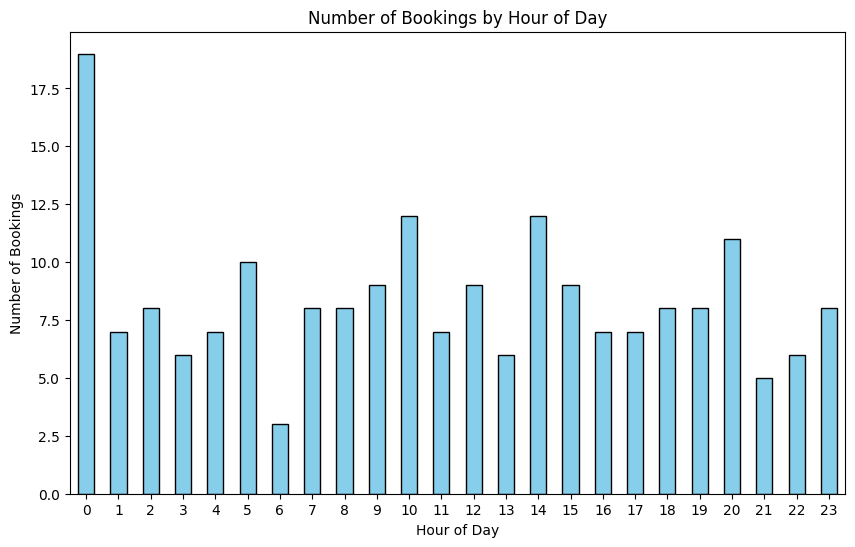

In [128]:
# Convert datetime to pandas datetime format if it's not already
history_data['datetime'] = pd.to_datetime(history_data['datetime'])

# Extract hour of booking
history_data['hour_of_day'] = history_data['datetime'].dt.hour

# Group by hour of the day and count bookings
booking_by_hour = history_data.groupby('hour_of_day').size()

# Plot the booking count by hour
plt.figure(figsize=(10, 6))
booking_by_hour.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Bookings by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()


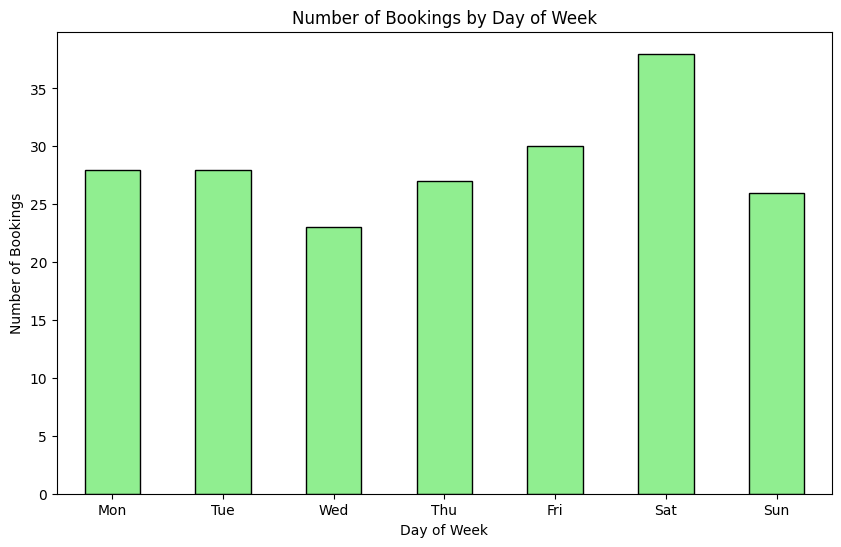

In [129]:
# Extract the day of the week from datetime (0 = Monday, 6 = Sunday)
history_data['day_of_week'] = history_data['datetime'].dt.dayofweek

# Group by day of the week and count bookings
booking_by_day = history_data.groupby('day_of_week').size()

# Plot the booking count by day of the week
plt.figure(figsize=(10, 6))
booking_by_day.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Bookings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


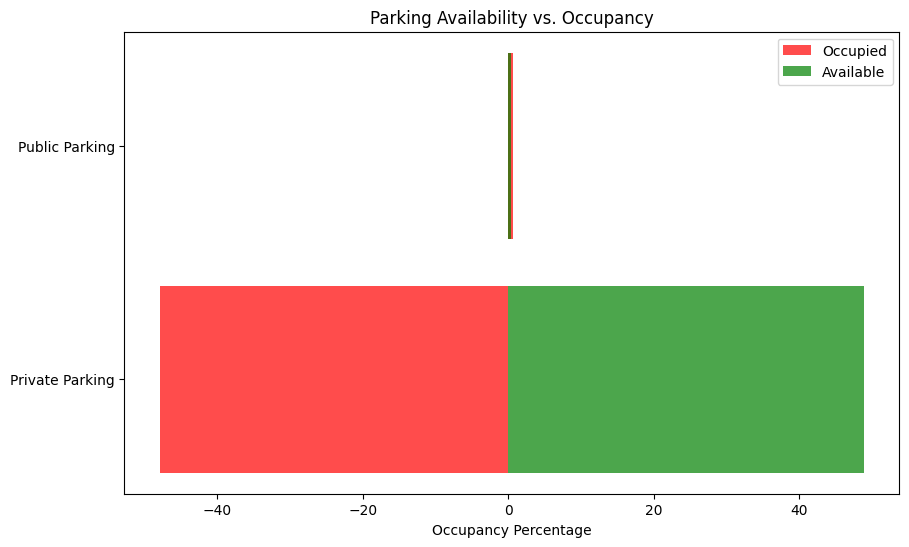

In [130]:
# Calculate occupancy percentage for private and public parking
private_parking_data['occupancy'] = 1 - (private_parking_data['available_space'] / private_parking_data['capacity'])
public_parking_data['occupancy'] = 1 - (public_parking_data['available_space'] / public_parking_data['capacity'])

# Plot stacked bar chart for occupancy
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(['Private Parking', 'Public Parking'], 
        [private_parking_data['occupancy'].mean(), public_parking_data['occupancy'].mean()],
        color='red', alpha=0.7, label='Occupied')

ax.barh(['Private Parking', 'Public Parking'], 
        [1 - private_parking_data['occupancy'].mean(), 1 - public_parking_data['occupancy'].mean()],
        color='green', alpha=0.7, label='Available')

ax.set_xlabel('Occupancy Percentage')
ax.set_title('Parking Availability vs. Occupancy')
ax.legend()
plt.show()


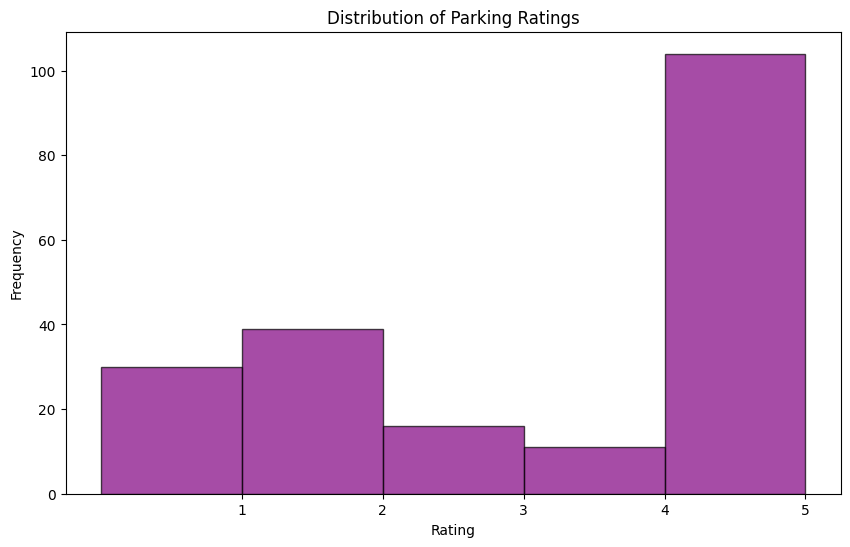

In [131]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(history_data['rating'], bins=5, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Parking Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])
plt.show()


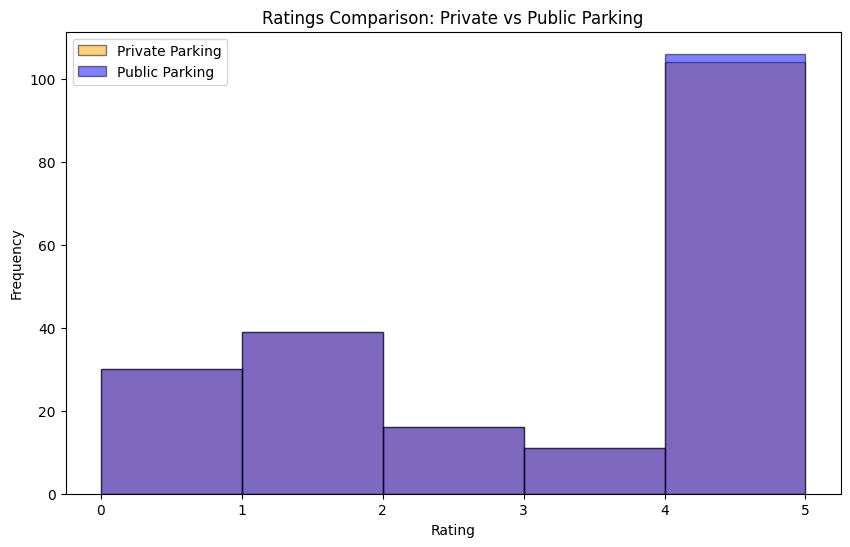

In [132]:
# Merge the history data with private and public parking data
history_private_parking = pd.merge(history_data, private_parking_data, left_on='parking_id', right_on='private_id', how='left')
history_public_parking = pd.merge(history_data, public_parking_data, left_on='parking_id', right_on='public_id', how='left')

# Plot the ratings comparison for private vs public parking
plt.figure(figsize=(10, 6))

# Plot ratings for private parking
plt.hist(history_private_parking['rating'], bins=5, alpha=0.5, label='Private Parking', color='orange', edgecolor='black')

# Plot ratings for public parking
plt.hist(history_public_parking['rating'], bins=5, alpha=0.5, label='Public Parking', color='blue', edgecolor='black')

plt.title('Ratings Comparison: Private vs Public Parking')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()
